In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [127]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
df=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv",)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.drop(["Cabin"],inplace=True,axis=1)

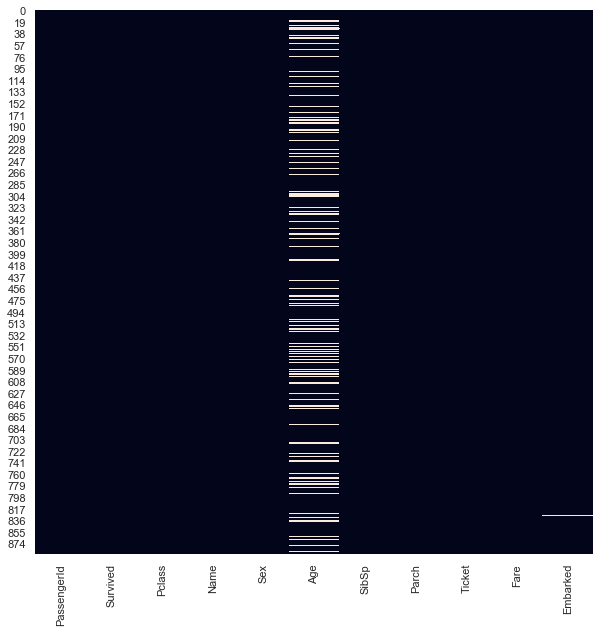

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [78]:
df.drop(["PassengerId","Name"],inplace=True,axis=1)

In [79]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [80]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [81]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [82]:
df.drop(['Ticket'],inplace=True,axis=1)

In [83]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [84]:
df[df["Embarked"].isnull()]["Embarked"]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [85]:
df.drop(df.index[61],inplace=True)

In [86]:
df.drop(df.index[829],inplace=True)

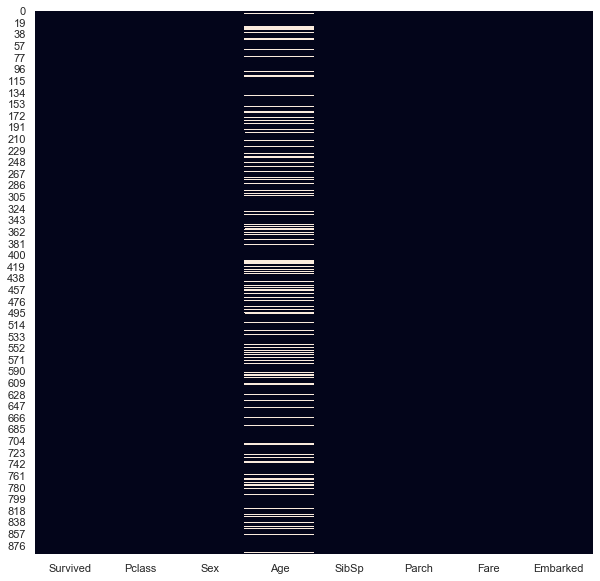

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

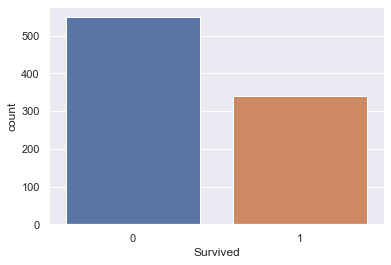

In [88]:
sns.countplot(df["Survived"])

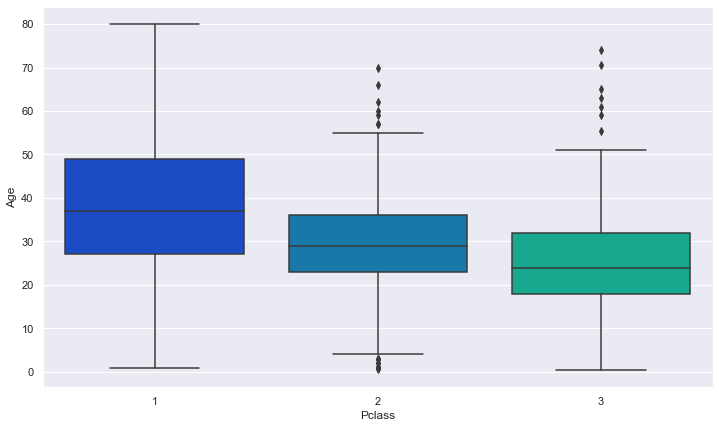

In [89]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [90]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [91]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

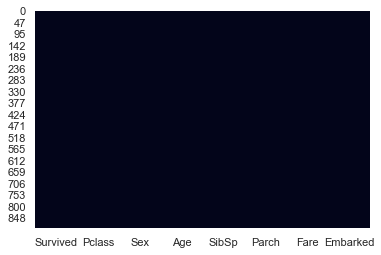

In [92]:
sns.heatmap(df.isnull(),cbar=False)

In [93]:
sex = pd.get_dummies(df['Sex'],drop_first=True,columns="Male")
embark = pd.get_dummies(df['Embarked'],drop_first=True,prefix='emb')

In [94]:
pclass=pd.get_dummies(df["Pclass"],drop_first=True,prefix="Pclass")

In [95]:
df.drop(["Sex","Embarked","Pclass"],inplace=True,axis=1)

In [96]:
df=pd.concat([df,sex,embark,pclass],axis=1)

In [97]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,emb_Q,emb_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [98]:
#constant removal
vr=VarianceThreshold(threshold=0.0)

In [99]:
X=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [100]:
X.head()

,Age,SibSp,Parch,Fare,male,emb_Q,emb_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [101]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [102]:
X_changed=vr.fit(X)

In [104]:
X_changed.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [107]:
model=DecisionTreeClassifier()

In [108]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
model.score(X_train,y_train)

0.9859353023909986

In [110]:
y_pred=model.predict(X_test)

In [111]:
model.score(X_test,y_test)

0.7640449438202247

In [112]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [114]:
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5)

In [116]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [117]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [120]:
model1=DecisionTreeClassifier(criterion='gini',
 max_depth= 8,
 min_samples_leaf=6,
 min_samples_split=6,
 splitter= 'random')

In [121]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [123]:
model1.score(X_train,y_train)

0.8241912798874824

In [125]:
y_pred1=model1.predict(X_test)

In [126]:
model.score(X_test,y_test)

0.7640449438202247

In [128]:
c=confusion_matrix(y_test,y_pred1)

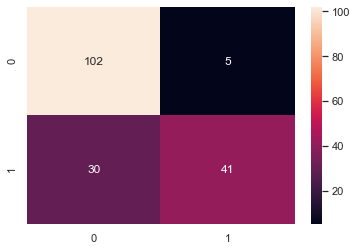

In [133]:
sns.heatmap(c,annot=True,fmt='0g')

In [134]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       107
           1       0.89      0.58      0.70        71

    accuracy                           0.80       178
   macro avg       0.83      0.77      0.78       178
weighted avg       0.82      0.80      0.79       178

